### Summary of the Terminal commands used ###

__mkdir lab02__: make directory named lab02  
__cd lab02__: change directory to new lab02 directory  
__mkdir src__: make directory src (source code)  
__mkdir data__: make directory data (to store data)  
__cd data__: enter data directory  
#### used jupyter notebook to upload seqs.fasta####
__muscle -in seqs.fa -out seqs.aligned.fa__ : call muscle command given seqs.fa as input; output the aligned version of the sequences as seqs.aligned.fa  
__more seqs.fa__ & __more seqs.aligned.fa__ : 2 separate commands to view differences between input and output files  
__fasttree –nt seqs.aligned.fa > tree.nwk__ : generate a newick-formatted tree
 


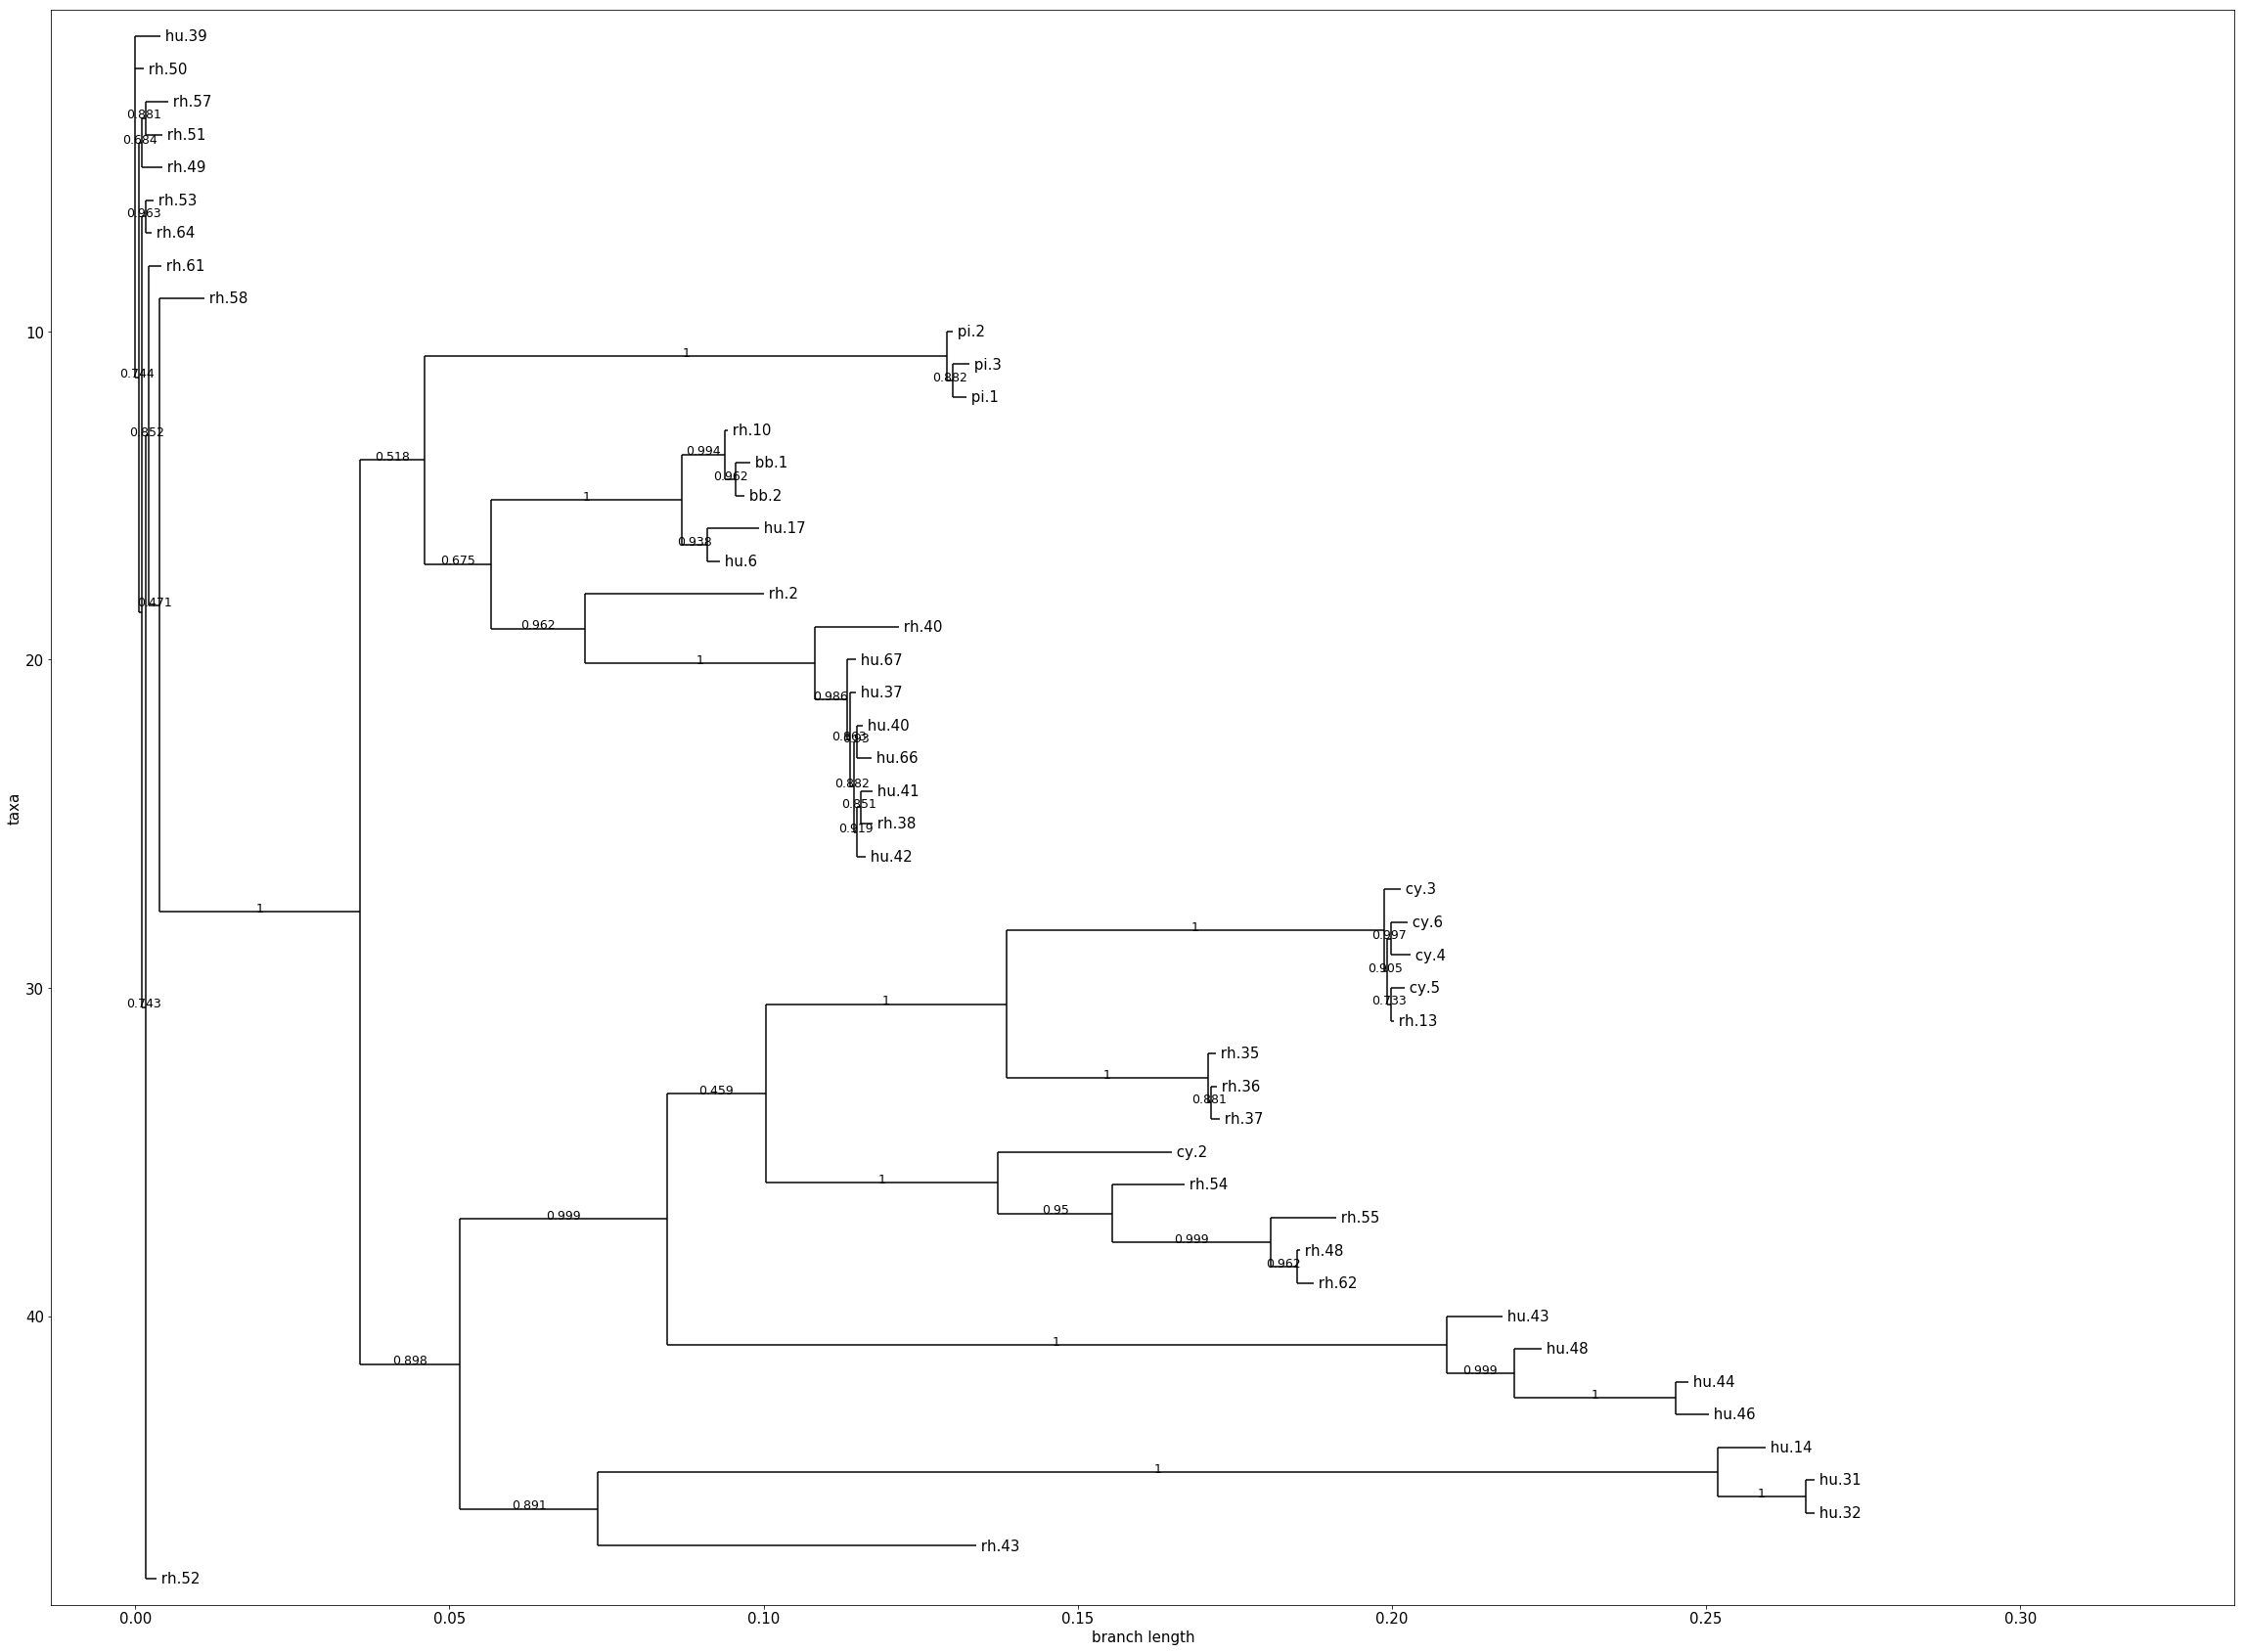

In [7]:
from Bio import Phylo
from io import StringIO
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
%matplotlib inline

# read in the tree object
tree = Phylo.read("tree.nwk", "newick")
# set the font size and figure size
mpl.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = [40, 30]
#plot the graph
Phylo.draw(tree)
